In [4]:
from platform import python_version
print(python_version())

3.10.0


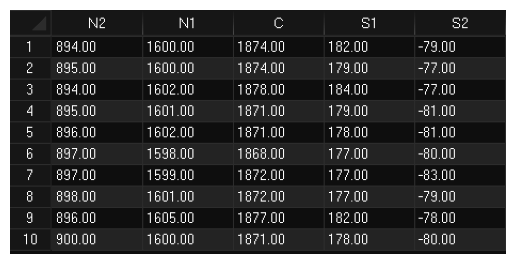

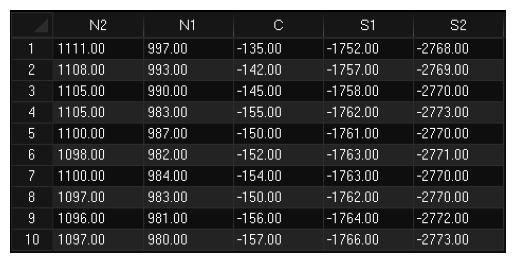

In [9]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('test_img1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('test_img2.png', cv2.IMREAD_GRAYSCALE)
# print(img.shape)

plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

In [2]:
import os
import pyautogui
from PIL import Image
import tkinter as tk
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pytesseract
import pandas as pd
from matplotlib.collections import PolyCollection

from imgToDf import *
from measurements import *
from visualization import *

today = str(dt.datetime.now()).split(' ')[0]
try:
    os.mkdir(f'data/{today}')
except FileExistsError: # pass if the folder already exists
    pass
    
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
custom_config = r'--oem 3 --psm 6 outputbase digits'

def resizeFrame(event):
    if frame :
        # button1.place(relx=0.18, rely=0.01, relwidth=0.3, relheight=0.08)
        # button2.place(relx=0.52, rely=0.01, relwidth=0.3, relheight=0.08)
        frame.place(relx=0.05, rely=0.1, relwidth=0.9, relheight=0.86)
        
def getTargetRegion(root, frame):
    root_position = root.wm_geometry()
    x = int(root_position.split('+')[1])
    y = int(root_position.split('+')[2])
    w = root.winfo_width()
    h = root.winfo_height()
    w_f = frame.winfo_width()
    h_f = frame.winfo_height()
    return (x+12+int(np.ceil(0.05*w)),y+57+int(np.ceil(0.1*h)),w_f,h_f) # numbers 12 and 57 added to adjust a region of being captured
    
root = tk.Tk()
# root.configure(bg='gray')
root.geometry('900x900')
root.wm_attributes('-transparentcolor', 'red')

#buttons 
button1 = tk.Button(root, text="T points", font=('serif', 8, 'bold'), 
                    command=lambda: [root.update(), frame.update, topPointMeasurement(root, frame)])
button1.place(relx=0.1, rely=0.01, relwidth=0.1, relheight=0.08)

button2 = tk.Button(root, text="B points", font=('serif', 8, 'bold'), 
                    command=lambda: [root.update(), frame.update, bottomPointMeasurement(root, frame)])
button2.place(relx=0.2, rely=0.01, relwidth=0.1, relheight=0.08)

button3 = tk.Button(root, text="Top", font=('serif', 8, 'bold'), 
                    command=lambda: [root.update(), frame.update, topMeasurement(root, frame)])
button3.place(relx=0.3, rely=0.01, relwidth=0.1, relheight=0.08)

button4 = tk.Button(root, text="Bottom", font=('serif', 8, 'bold'), 
                    command=lambda: [root.update(), frame.update, bottomMeasurement(root, frame)])
button4.place(relx=0.4, rely=0.01, relwidth=0.1, relheight=0.08)

button5 = tk.Button(root, text="P_T", font=('serif', 8, 'bold'), 
                    command=lambda: [root.update(), frame.update, preciseTopMeasurement(root, frame)])
button5.place(relx=0.5, rely=0.01, relwidth=0.1, relheight=0.08)

button6 = tk.Button(root, text="P_B", font=('serif', 8, 'bold'), 
                    command=lambda: [root.update(), frame.update, preciseBottomMeasurement(root, frame)])
button6.place(relx=0.6, rely=0.01, relwidth=0.1, relheight=0.08)

button7 = tk.Button(root, text="Final", font=('serif', 8, 'bold'), 
                    command=lambda: [root.update(), frame.update, getFinalResults(root, frame)])
button7.place(relx=0.7, rely=0.01, relwidth=0.1, relheight=0.08)

tk.Label(root, text="IMG name").grid(row=0)
entry=tk.Entry(root, width=10, insertontime=600)
# entry.insert(0, "img_name") 
# entry.pack()
entry.grid(row=0, column=1)

button8 = tk.Button(root, text="PNG", font=('serif', 8, 'bold'), 
                    command=lambda: [root.update(), frame.update, savePNG(root, frame, entry.get())])
button8.place(relx=0.8, rely=0.01, relwidth=0.1, relheight=0.08)

# make this transparent frame adjustable
frame = tk.Frame(root, bg='red')
frame.place(relx=0.05, rely=0.1, relwidth=0.9, relheight=0.86)
root.bind('<Configure>', resizeFrame)
root.title("Screen Reader")

root.attributes('-topmost', True)
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\syj43\AppData\Local\Temp\ipykernel_3532\54967112.py", line 54, in <lambda>
    command=lambda: [root.update(), frame.update, bottomPointMeasurement(root, frame)])
  File "C:\Users\syj43\OCR_for_wet_etching_rate\test2_split_modules\measurements.py", line 33, in bottomPointMeasurement
    screenshot = pyautogui.screenshot(region=getTargetRegion(root, frame))
NameError: name 'pyautogui' is not defined
